### Linear Models follow some assumptions

If you are going to interpret the model, then make sure that you've normalized the values.
(Why do we need to normalize values. For values having higher range e.g. income range is in thousands and another factor age range is in units (10-80). So change in income factor will influence the target more,  because of the higher range.
(see the difference in the values of coefficients before and after normalizing the data. Some of the prominent coefficients will smoothen after normalization)


1. The residuals should have a constant variance i.e. There should be no trend in the residuals.
2. The distribution of the residuals/errors should be normal. (distplot / QQ plot)
3. Check for multi-colinearity (VIF) - The data should not be multi-colinear i.e. there shouldn't be collinearity / corelation between idependent variables. Variance Inflation Factor. statmodel.stat.outlier_influence.variance_inflation_factor (if value >= 5, multicolinear attribute)
4.  Errors Normally Distributed

### Least Square Method

LSM is used to find the equation of a line (slope & intercept).

y = mx+b

Finding the slope m:
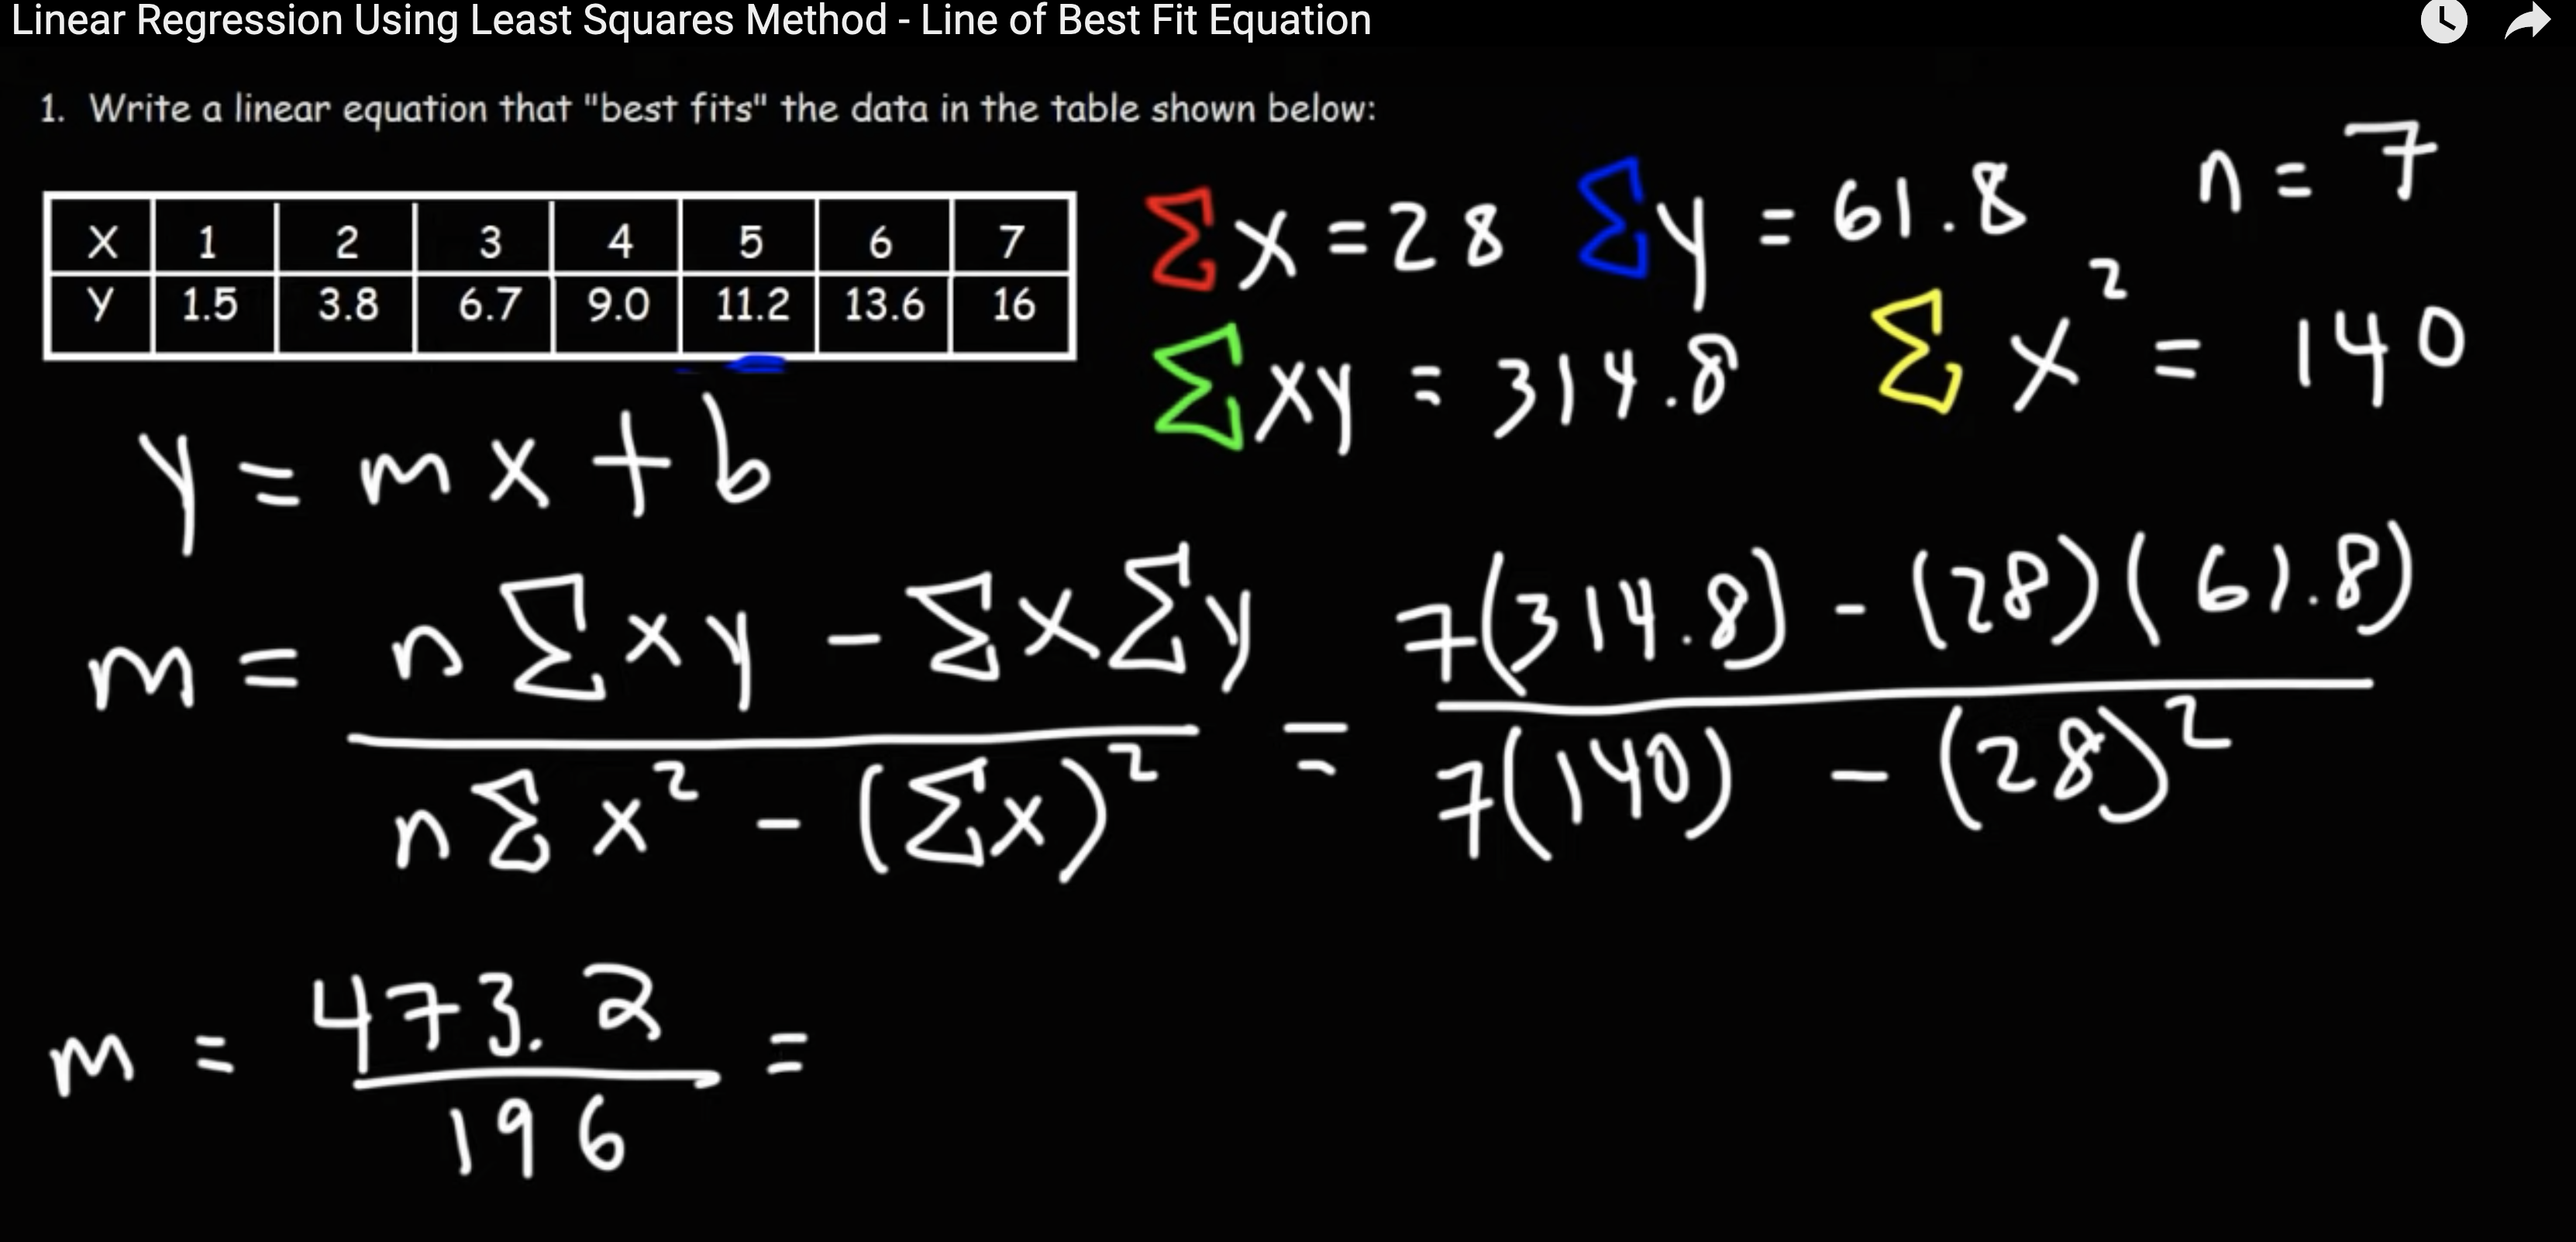

Finding the intercept b:
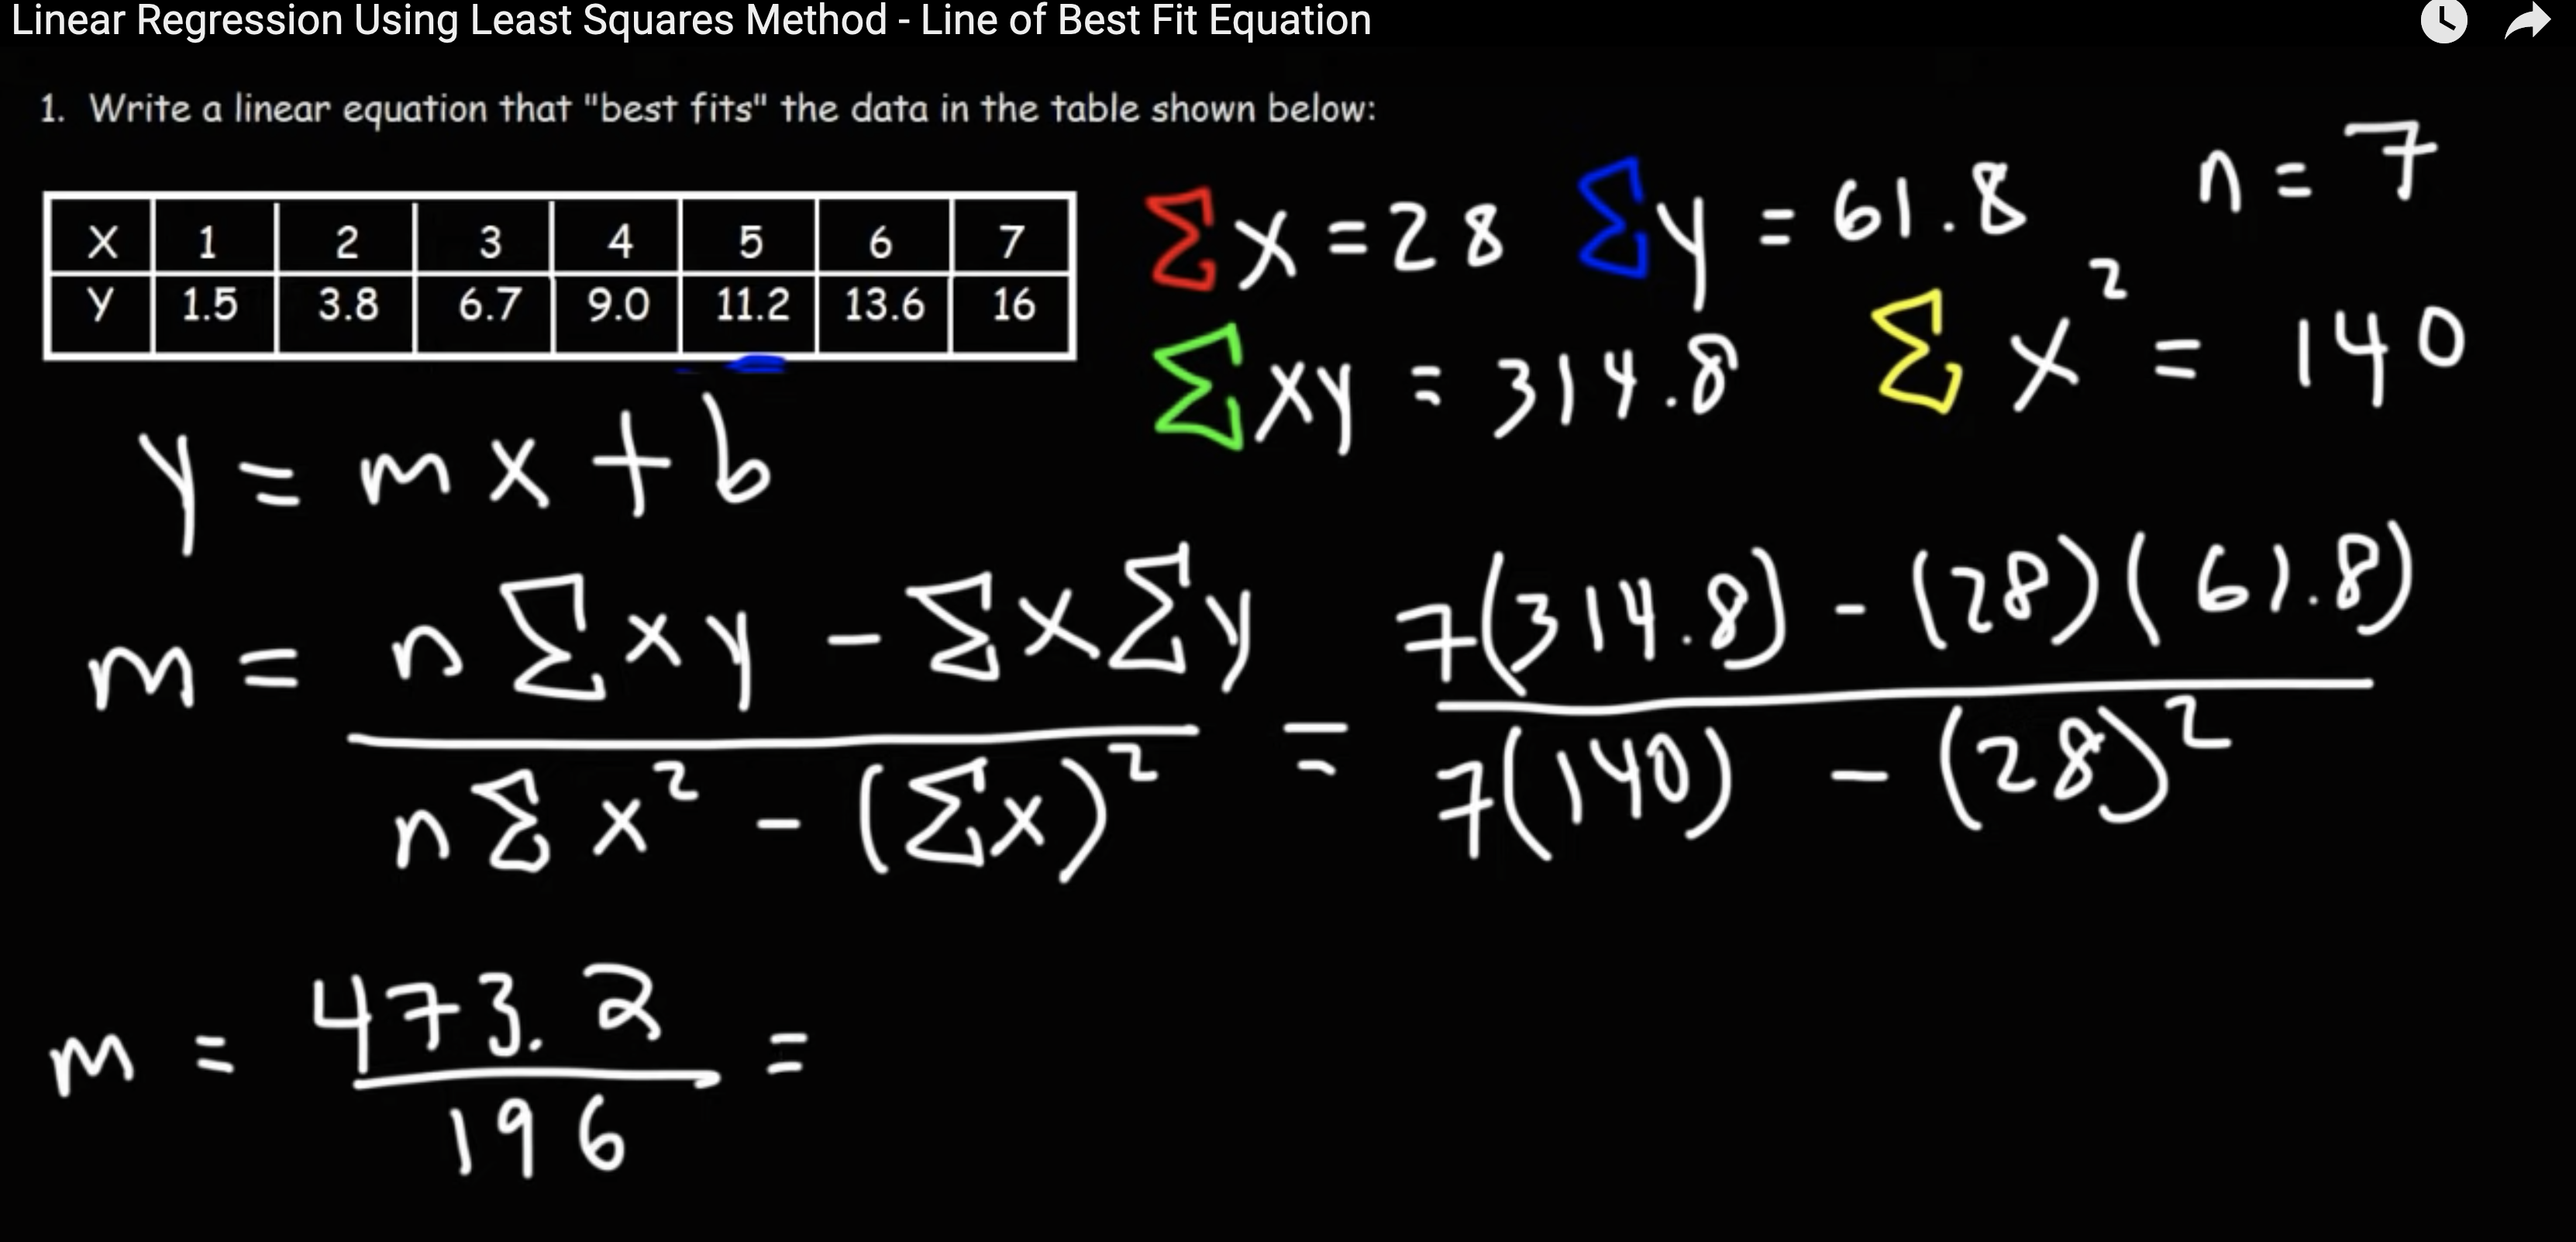

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train_cleaned.csv')

In [3]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_LF              8523 non-null   int64  
 6   Item_Fat_Content_Low Fat         8523 non-null   int64  
 7   Item_Fat_Content_Regular         8523 non-null   int64  
 8   Item_Fat_Content_low fat         8523 non-null   int64  
 9   Item_Fat_Content_reg             8523 non-null   int64  
 10  Item_Type_Baking Goods           8523 non-null   int64  
 11  Item_Type_Breads                 8523 non-null   int64  
 12  Item_Type_Breakfast 

In [7]:
# No Nulls values

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914,0.037076,0.597090,0.338965,0.013141,0.013728,...,0.109351,0.327702,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,6.431899,0.051598,62.275067,8.371760,1706.499616,0.188960,0.490512,0.473386,0.113885,0.116365,...,0.312098,0.469403,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
# without normalize

In [12]:
model = LinearRegression()

In [14]:
X = df.drop(columns=['Item_Outlet_Sales']).copy()

In [15]:
y = df['Item_Outlet_Sales'].copy()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=36)

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)

In [23]:
residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': predictions-y_test})

In [24]:
residuals

,Actual,Predicted,Residuals
1875,1046.6376,2288.460051,1241.822451
4258,2865.6032,2817.785479,-47.817721
2839,4711.2008,2508.426692,-2202.774108
10,1516.0266,858.243720,-657.782880
4251,1031.9900,1717.019071,685.029071
...,...,...,...
6357,745.6960,1197.747142,452.051142
572,2770.3938,2301.330144,-469.063656
5821,4566.7222,5352.439922,785.717722
302,5895.6590,2752.316460,-3143.342540


In [25]:
# Assumption No. 1
# The Distribution of Residuals should be normal

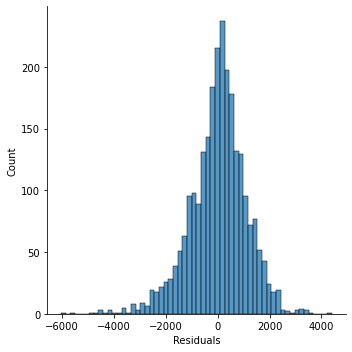

In [26]:
sns.displot(residuals.Residuals)

In [40]:
conda install -c conda-forge statsmodels

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       h033912b_0         149 KB  conda-forge
    certifi-2022.6.15          |   py39h6e9494a_0         155 KB  conda-forge
    conda-4.13.0               |   py39h6e9494a_1         986 KB  conda-forge
    openssl-1.1.1p             |       hfe4f2af_0         1.9 MB  conda-forge
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    statsmodels-0.13.2         |   py39h15b18c7_0        10.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        14.0 MB

The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.2-pyhd8ed1ab_0
  statsmodel

In [42]:
from statsmodels.graphics.gofplots import qqplot

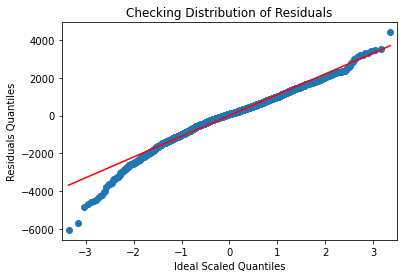

In [46]:
qqplot(data=residuals.Residuals, line='s')
plt.ylabel('Residuals Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking Distribution of Residuals')
plt.show()

In [27]:
# The Residuals Distribution looks normal which means the residuals have a symmetry around the mean and the 
# difference from actual to predicted value follow the same range of errors more frequently. So, minimum
# extreme differences between the actual & predicted values...

In [28]:
# Assumption no. 2
# The residuals should have a constant variance. The variance in residuals should not follow a pattern like
# keep increasing or decreasing instead they should have a constant range

In [30]:
residuals.shape

(2557, 3)

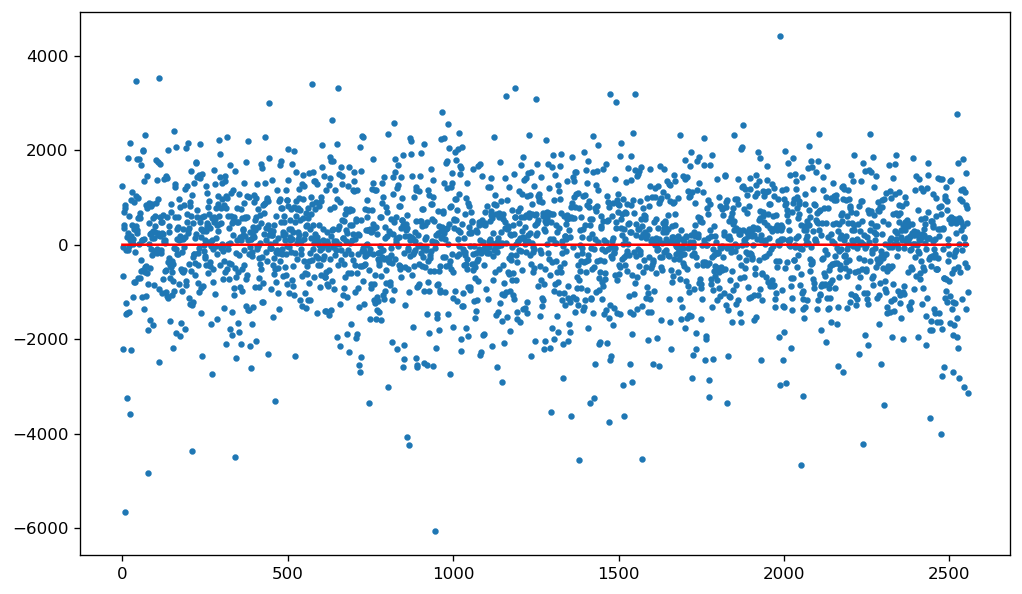

In [36]:
# 2557
k = range(0, residuals.shape[0])
f = [0 for i in range(residuals.shape[0])]
plt.figure(figsize=(10,6), dpi=120, facecolor='w', edgecolor='b')
plt.scatter(x=k, y=residuals.Residuals[:], s=8, label='residuals')
plt.plot(k, f, color='red', label='regression line') # where residuals are 0 that's our regression line...
plt.show()

In [37]:
# The variance also look symmetrical...

In [39]:
# Assumption No. 3
# There should be no correlation/multicolinearity between the features/columns
# The VIF Variance Inflation Factor should be < 5 for the columns

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
VIF = pd.Series( [variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns )
# variance_inflation_factor((df.values, [i for i in range(df.shape[1])]),  )

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [71]:
VIF

Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

In [72]:
# Non of the values surpass 5 which means there is no collinearity between the values...

In [73]:
model.intercept_

37375.55814500792

In [85]:
# Assumption no. 4
# Errors / data should be normalized...

<BarContainer object of 45 artists>

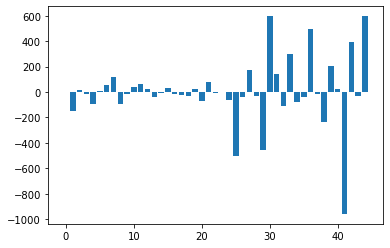

In [83]:
plt.bar(x=[i for i in range(45)], height= model.coef_)
# we can run this again after normalizing the data and the results would be different.
# Errors are not Normalized...

In [86]:
model_Normal = LinearRegression(normalize=True)

In [87]:
model_Normal.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [88]:
predictions_Normal = model_Normal.predict(X_test)

In [89]:
residuals_Normal = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_Normal,
                                 'Residuals': predictions_Normal-y_test})

In [90]:
residuals_Normal

,Actual,Predicted,Residuals
1875,1046.6376,2296.0,1249.3624
4258,2865.6032,2816.0,-49.6032
2839,4711.2008,2512.0,-2199.2008
10,1516.0266,864.0,-652.0266
4251,1031.9900,1728.0,696.0100
...,...,...,...
6357,745.6960,1200.0,454.3040
572,2770.3938,2304.0,-466.3938
5821,4566.7222,5360.0,793.2778
302,5895.6590,2752.0,-3143.6590


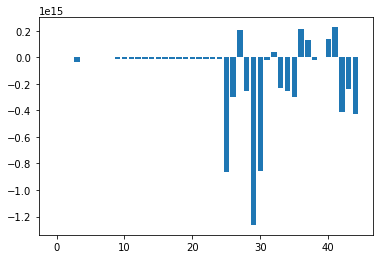

In [93]:
plt.bar(x=[i for i in range(X_train.shape[1])], height=model_Normal.coef_)
plt.show()

After normalizing the data, some of the coefficient values are suppressed...
Hence for Linear Regression the values should always be scaled to catch the actual impact on the target column, regardless of the range of the column (higher range column tend to impact more than lower range columns, if not normalized)

### Generalized Linear Models

##### The general equation of linear models is y_hat = Beta* f(x) + intercept
##### where f(x) can be any function of x
##### For a simple linear model, we keep it as f(x) = x, so the equation becomes y_hat = Beta*x + intercept
##### we can change this f(x) to any equation like f(x) = X_square + X... and the equation will become y_hat = Beta*(X_sqaure+X) + intercept
##### => y_hat = Beta*X_square + Beta*X + intercept


##### Hence changing the linear function to any required function can solve / create new generalized models.